In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train (1).csv')
validation = pd.read_csv('/content/validation_data.csv')
test = pd.read_csv('/content/test-data.csv')

In [ ]:
print(train.head())
print(validation.head())
print(test.head())

                                          text_tamil  label
0  இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...      0
1  நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...      1
2  என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும்,...      0
3  நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...      1
4  பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...      1
                                          text_tamil  label
0  நான் என்னைப் பற்றி மிகவும் வருத்தமாகவும் வருத்...      0
1  நான் இன்னும் ஒரு வெற்று கேன்வாஸ் வெற்று காகித ...      0
2            நான் உண்மையுள்ள வேலைக்காரனாக உணர்கிறேன்      2
3         நான் வெறித்தனமாகவும் நீலமாகவும் உணர்கிறேன்      3
4  நான் விருந்து சாப்பிடலாம் அல்லது நான் பண்டிகைய...      1
                                          text_tamil  label
0  நான் மிகவும் அழுகியதாக உணர்கிறேன், அதனால் நான்...      0
1  நான் என் வலைப்பதிவைப் புதுப்பிக்கிறேன், ஏனென்ற...      0
2  நான் வந்ததை விட சற்று அதிக நம்பிக்கையுடன் என் ...      1
3     நான் இதை செய்யும்போது கொஞ்சம் வீணா

In [ ]:
labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text_tamil,label,description
0,இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...,0,sadness
1,நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...,1,joy
2,"என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும்,...",0,sadness
3,நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...,1,joy
4,பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...,1,joy


In [ ]:
train['description'].value_counts(normalize=True)

joy         0.335562
sadness     0.293938
anger       0.132875
fear        0.122063
love        0.080437
surprise    0.035125
Name: description, dtype: float64

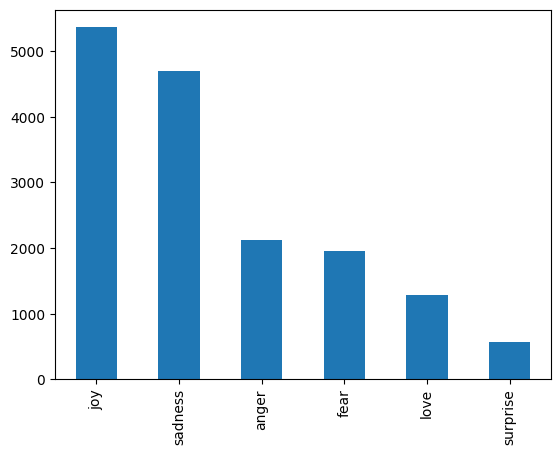

In [ ]:
train['description'].value_counts().plot(kind='bar');


In [ ]:
def text_cleaning(text):
    punctuation_removed = [char for char in text if char not in string.punctuation]
    p_join = ''.join(punctuation_removed)
    return p_join


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:


import string
ddtrain = train['text_tamil'].apply(text_cleaning)
ddvalid = validation['text_tamil'].apply(text_cleaning)
train['list'] = ddtrain
validation['list'] = ddvalid

print(train.head())
print(validation.head())

                                          text_tamil  label description  \
0  இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...      0     sadness   
1  நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...      1         joy   
2  என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும்,...      0     sadness   
3  நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...      1         joy   
4  பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...      1         joy   

                                                list  
0  இந்த வார இறுதியில் நான் மிகவும் ஏக்கமாக உணர்கி...  
1  நான் உண்மையிலேயே நம்பிக்கையுடன் இருக்க ஆரம்பித...  
2  என்னால் முடிந்ததைச் சிறப்பாகச் செய்ய வேண்டும் ...  
3  நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச்...  
4  பயனுள்ளதாக உணர்ந்ததற்கு நான் நன்றியுள்ளவனாக இர...  
                                          text_tamil  label  \
0  நான் என்னைப் பற்றி மிகவும் வருத்தமாகவும் வருத்...      0   
1  நான் இன்னும் ஒரு வெற்று கேன்வாஸ் வெற்று காகித ...      0   
2            நான் உண்மையுள்ள வ

In [ ]:
X_train, y_train = train['list'].values, train['label'].values
X_val, y_val = validation['list'].values, validation['label'].values
X_test, y_test = test['text_tamil'].values, test['label'].values

print(X_train[3])
print(X_val[3])
print(X_test[3])

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)



நான் எங்களை கார் பாகங்கள் இடத்திற்கு அழைத்துச் சென்றேன் மீண்டும் ஓட்டுவது பாதுகாப்பானது போல் டெர்ரி உணர்கிறார்
நான் வெறித்தனமாகவும் நீலமாகவும் உணர்கிறேன்
நான் இதை செய்யும்போது கொஞ்சம் வீணாக உணர்ந்தேன்
(16000,) (16000,)
(1455,) (1455,)


In [ ]:
max_features = 2000

tokenizer = Tokenizer(num_words=max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_pad = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_pad, padding='post', truncating="post", maxlen=100)

vocab_size = len(tokenizer.word_index) + 1

X_val_pad = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_pad, padding='post', truncating="post", maxlen=100)

In [ ]:
print(X_train_pad.shape, X_train_pad[0])
print(X_val_pad.shape, X_val_pad[0])

(16000, 100) [ 11 324 281   2   5 370   3   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(2000, 100) [  2  68  12   5 585 585   3   9 419   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import  Flatten, GlobalMaxPooling1D, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU, Conv1D, Bidirectional,  MaxPooling1D

In [ ]:
embed_dim = 300

model1 = Sequential([
    Embedding(max_features, embed_dim, input_length=X_train_pad.shape[1]),
    Bidirectional(LSTM(156, dropout=0.2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dense(6, activation = 'softmax')
])
print(model1.summary())

model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          600000    
                                                                 
 bidirectional (Bidirectiona  (None, 312)              570336    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 312)               0         
                                                                 
 dense (Dense)               (None, 128)               40064     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                        

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

history1 = model1.fit(X_train_pad, y_train, validation_data=(X_val_pad,y_val), epochs=12, batch_size=64)

Epoch 1/12
250/250 [==============================] - 40s 101ms/step - loss: 1.4335 - accuracy: 0.4424 - val_loss: 1.2270 - val_accuracy: 0.5465
Epoch 2/12
250/250 [==============================] - 6s 26ms/step - loss: 1.0574 - accuracy: 0.6198 - val_loss: 1.0458 - val_accuracy: 0.6115
Epoch 3/12
250/250 [==============================] - 5s 21ms/step - loss: 0.8814 - accuracy: 0.6806 - val_loss: 1.0244 - val_accuracy: 0.6355
Epoch 4/12
250/250 [==============================] - 6s 24ms/step - loss: 0.7946 - accuracy: 0.7109 - val_loss: 1.0194 - val_accuracy: 0.6440
Epoch 5/12
250/250 [==============================] - 5s 22ms/step - loss: 0.7350 - accuracy: 0.7299 - val_loss: 1.0665 - val_accuracy: 0.6335
Epoch 6/12
250/250 [==============================] - 5s 21ms/step - loss: 0.6863 - accuracy: 0.7479 - val_loss: 1.1045 - val_accuracy: 0.6295
Epoch 7/12
250/250 [==============================] - 5s 20ms/step - loss: 0.6373 - accuracy: 0.7681 - val_loss: 1.2055 - val_accuracy: 0.61

In [ ]:
X_test_pad = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_pad, padding='post', truncating="post", maxlen=100)

#Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
t_results = model1.evaluate(X_test_pad , y_test, batch_size=32)

print("Test loss:{} and Test accuracy:{}%".format(round(t_results[0], 3), round(t_results[1]*100)))

Evaluate on test data
46/46 [==============================] - 0s 6ms/step - loss: 0.8357 - accuracy: 0.7911
Test loss:0.836 and Test accuracy:79%


In [ ]:
import numpy as np
y_pred =   np.argmax(model1.predict(X_test_pad), axis=1)
y_true = np.argmax(y_test, axis=1)
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

46/46 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       480
           1       0.86      0.84      0.85       551
           2       0.58      0.62      0.60        84
           3       0.70      0.77      0.74       168
           4       0.70      0.72      0.71       141
           5       0.37      0.45      0.41        31

    accuracy                           0.79      1455
   macro avg       0.68      0.70      0.69      1455
weighted avg       0.80      0.79      0.79      1455



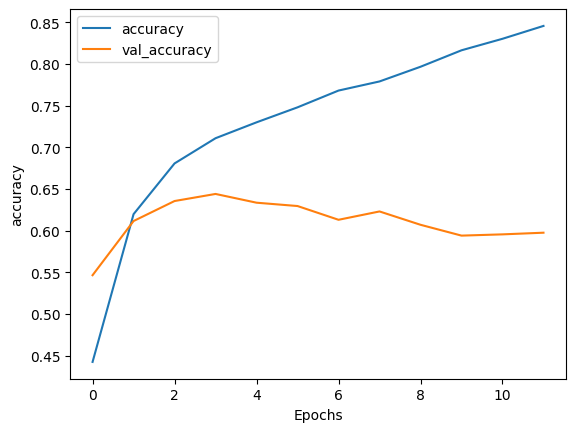

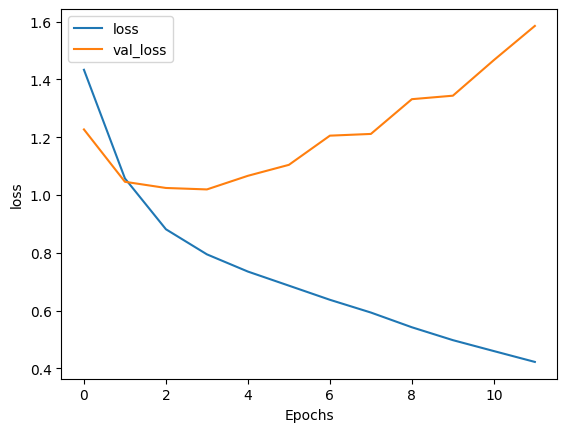

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")
